## Reading data
At this step, we will open a dataset and select two text columns from it.

In [1]:
import pandas as pd

In [3]:
data_path = "ted_main.csv"
data = pd.read_csv(data_path)

In [4]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [5]:
data = data[['description', 'main_speaker', 'name']]

In [6]:
data.head()

,description,main_speaker,name
0,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Ken Robinson: Do schools kill creativity?
1,With the same humor and humanity he exuded in ...,Al Gore,Al Gore: Averting the climate crisis
2,New York Times columnist David Pogue takes aim...,David Pogue,David Pogue: Simplicity sells
3,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Majora Carter: Greening the ghetto
4,You've never seen data presented like this. Wi...,Hans Rosling,Hans Rosling: The best stats you've ever seen


## Preparing data for processing

To make a tokenization, we can simply use tokenizers from nltk.

In [7]:
from nltk import WordPunctTokenizer

In [8]:
tokenizer = WordPunctTokenizer()

In [9]:
descriptions = [tokenizer.tokenize(description.lower()) for description in data["description"]]

In [10]:
print(descriptions[0])

['sir', 'ken', 'robinson', 'makes', 'an', 'entertaining', 'and', 'profoundly', 'moving', 'case', 'for', 'creating', 'an', 'education', 'system', 'that', 'nurtures', '(', 'rather', 'than', 'undermines', ')', 'creativity', '.']


## Converting texts to a Bag-of-Words format

In [11]:
from gensim import corpora

In [12]:
corpora_dict = corpora.Dictionary(descriptions)

In [ ]:
print(corpora_dict.token2id)

In [18]:
for token, token_id in corpora_dict.token2id.items():
    corpora_dict.id2token[token_id] = token

In [19]:
print(corpora_dict.id2token)

{0: '(', 1: ')', 2: '.', 3: 'an', 4: 'and', 5: 'case', 6: 'creating', 7: 'creativity', 8: 'education', 9: 'entertaining', 10: 'for', 11: 'ken', 12: 'makes', 13: 'moving', 14: 'nurtures', 15: 'profoundly', 16: 'rather', 17: 'robinson', 18: 'sir', 19: 'system', 20: 'than', 21: 'that', 22: 'undermines', 23: '"', 24: ',', 25: ',"', 26: '15', 27: 'a', 28: 'address', 29: 'al', 30: 'brand', 31: 'buying', 32: 'can', 33: 'change', 34: 'climate', 35: 'exuded', 36: 'from', 37: 'global', 38: 'gore', 39: 'he', 40: 'hotter', 41: 'humanity', 42: 'humor', 43: 'hybrid', 44: 'immediately', 45: 'in', 46: 'inconvenient', 47: 'individuals', 48: 'inventing', 49: 'name', 50: 'new', 51: 'out', 52: 'same', 53: 'spells', 54: 'the', 55: 'to', 56: 'truth', 57: 'warming', 58: 'ways', 59: 'with', 60: '-', 61: 'aim', 62: 'at', 63: 'bursts', 64: 'columnist', 65: 'david', 66: 'design', 67: 'encouraging', 68: 'examples', 69: 'funny', 70: 'get', 71: 'interface', 72: 'into', 73: 'it', 74: 'of', 75: 'offenders', 76: 'pogu

In [17]:
len(corpora_dict)

15578

In [20]:
new_doc = "Save trees in sake of ecology!"
new_vec = corpora_dict.doc2bow(tokenizer.tokenize(new_doc.lower()))
print(new_vec)

for word_id, _ in new_vec:
    print(corpora_dict.id2token[word_id], end=' ')

[(45, 1), (74, 1), (903, 1), (3286, 1), (3753, 1), (5202, 1), (9495, 1)]
in of save ! trees ecology sake 

In [21]:
corpus = [corpora_dict.doc2bow(text) for text in descriptions]

In [22]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]


## BoW search machine

In [23]:
from gensim import similarities

In [24]:
index_bow = similarities.SparseMatrixSimilarity(corpus, num_features=len(corpora_dict))

In [25]:
def search(index, query, top_n=5, prints=False):
    """
    This function searches the most similar texts to the query.
        :param index: gensim.similarities object
        :param query: a string
        :param top_n: how many variants it returns
        :param prints: if True returns the results, otherwise prints the results
        :returns: a list of tuples (matched_document_index, similarity_value)
    """
    # getting a BoW vector
    bow_vec = corpora_dict.doc2bow(query.lower().split())
    similarities = index[bow_vec]  # get similarities between the query and all index documents
    similarities = [(x, i) for i, x in enumerate(similarities)]
    similarities.sort(key=lambda elem: -elem[0])  # sorting by similarity_value in decreasing order
    res = []
    if prints:
        print(f"{query}\n")
    for result in similarities[:top_n]:
        if prints:
            print(f"{data['description'][result[1]]} \t {result[0]}\n")
        else:
            res.append((result[1], result[0]))
    if not prints:
        return res

In [26]:
search(index_bow, "education system", prints=True)

education system

Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity. 	 0.2773500978946686

Why, why, why does our education system look so similar to the way it did 50 years ago? Millions of students were failing then, as they are now -- and it’s because we’re clinging to a business model that clearly doesn’t work. Education advocate Geoffrey Canada dares the system to look at the data, think about the customers and make systematic shifts in order to help greater numbers of kids excel.  	 0.23408228158950806

Britta Riley wanted to grow her own food (in her tiny apartment). So she and her friends developed a system for growing plants in discarded plastic bottles -- researching, testing and tweaking the system using social media, trying many variations at once and quickly arriving at the optimal system. Call it distributed DIY. And the results? Delicious. 	 0.20507577061653137

In 2006, op

In [27]:
search(index_bow, "healthy food", prints=True)

healthy food

Josette Sheeran, the head of the UN's World Food Program, talks about why, in a world with enough food for everyone, people still go hungry, still die of starvation, still use food as a weapon of war. Her vision: "Food is one issue that cannot be solved person by person. We have to stand together." 	 0.24618297815322876

Economist Eleni Gabre-Madhin outlines her ambitious vision to found the first commodities market in Ethiopia. Her plan would create wealth, minimize risk for farmers and turn the world's largest recipient of food aid into a regional food basket. 	 0.19425715506076813

What if we could grow delicious, nutrient-dense food, indoors anywhere in the world? Caleb Harper, director of the Open Agriculture Initiative at the MIT Media Lab, wants to change the food system by connecting growers with technology. Get to know Harper's "food computers" and catch a glimpse of what the future of farming might look like. 	 0.1912730187177658

Homaro Cantu and Ben Roche come

In [28]:
search(index_bow, "Majora Carter: Greening the ghetto", prints=True)

Majora Carter: Greening the ghetto

Gerard Ryle led the international team that divulged the Panama Papers, the 11.5 million leaked documents from 40 years of activity of the Panamanian law firm Mossack Fonseca that have offered an unprecedented glimpse into the scope and methods of the secretive world of offshore finance. Hear the story behind the biggest collaborative journalism project in history. 	 0.4815434217453003

Why is there something rather than nothing? Why does so much interesting stuff exist in the universe? Particle physicist Harry Cliff works on the Large Hadron Collider at CERN, and he has some potentially bad news for people who seek answers to these questions. Despite the best efforts of scientists (and the help of the biggest machine on the planet), we may never be able to explain all the weird features of nature. Is this the end of physics? Learn more in this fascinating talk about the latest research into the secret structure of the universe. 	 0.4796227812767029


In [29]:
user_input = input("Enter a search term: ")
search(index_bow,user_input, prints=True)

Enter a search term:  commodities market


commodities market

Economist Eleni Gabre-Madhin outlines her ambitious vision to found the first commodities market in Ethiopia. Her plan would create wealth, minimize risk for farmers and turn the world's largest recipient of food aid into a regional food basket. 	 0.19425715506076813

Josh Luber is a "sneakerhead," a collector of rare or limited sneakers. With their insatiable appetite for exclusive sneakers, these tastemakers drive marketing and create hype for the brands they love, specifically Nike, which absolutely dominates the multi-billion dollar secondary market for sneakers. Luber's company, Campless, collects data about this market and analyzes it for collectors and investors. In this talk, he takes us on a journey into this complicated, unregulated market and imagines how it could be a model for a stock market for commerce. 	 0.1792442798614502

In this short, image-packed talk, Marisa Fick-Jordan talks about how a village of traditional Zulu wire weavers built a worldwid

On the next step, we will make more 'smart' model, TF-IDF model. 

## TF-IDF model

In [30]:
from gensim.models import TfidfModel

In [31]:
model_tfidf = TfidfModel(corpus)

In [32]:
vector = model_tfidf[corpus[0]]

In [33]:
print(vector)

[(0, 0.09299275762489155), (1, 0.12836378471303087), (2, 0.0008798968518018828), (3, 0.15022705068092762), (4, 0.007414799937318232), (5, 0.16199524894912434), (6, 0.19094991000449393), (7, 0.20857662068134003), (8, 0.19535287961090125), (9, 0.24291182356031873), (10, 0.04847664877446286), (11, 0.27895934998103994), (12, 0.13463955775566674), (13, 0.1728352297760312), (14, 0.37099656456126073), (15, 0.3054279299315049), (16, 0.21012750624544083), (17, 0.27895934998103994), (18, 0.286250333690558), (19, 0.1773431889305629), (20, 0.12383038981063735), (21, 0.038036314311951196), (22, 0.37099656456126073)]


In [34]:
corpus_tfidf = model_tfidf[corpus]

In [35]:
index_tfidf = similarities.SparseMatrixSimilarity(corpus_tfidf, num_features=len(corpora_dict))

In [36]:
search(index_tfidf, "Majora Carter: Greening the ghetto", prints=True)

Majora Carter: Greening the ghetto

The future of green is local. Majora Carter tells three inspiring stories of people who are saving their own communities while saving the planet. 	 0.2743656039237976

In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy. 	 0.20010948181152344

Why is there something rather than nothing? Why does so much interesting stuff exist in the universe? Particle physicist Harry Cliff works on the Large Hadron Collider at CERN, and he has some potentially bad news for people who seek answers to these questions. Despite the best efforts of scientists (and the help of the biggest machine on the planet), we may never be able to explain all the weird features of nature. Is this the end of physics? Learn more in this fascinating talk about the latest research into the secret structure of the universe. 	 0.02

Much better! Now that we have Majora Carter talks in the top of the results. How many talks did she have?

In [37]:
data[data["main_speaker"] == "Majora Carter"]

,description,main_speaker,name
3,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Majora Carter: Greening the ghetto
836,The future of green is local. Majora Carter te...,Majora Carter,Majora Carter: 3 stories of local eco-entrepre...


Now, it's time to use dense vectors instead of sparse ones.

## Doing SVD / LSA with your own hands

This approach has a lot of names but it's main idea is quite simple: we try to approximate out source matrix by matrix of a lower rank. In this task, we will use original BoW matrix.

In [38]:
from scipy.sparse import coo_matrix

In [39]:
i_inds = []
j_inds = []
data_ij_values = []

for i_ind, sparse_doc in enumerate(corpus):
    for j_ind, data_ij in sparse_doc:
        i_inds.append(i_ind)
        j_inds.append(j_ind)
        data_ij_values.append(data_ij)
sparse_corpus = coo_matrix((data_ij_values, (i_inds, j_inds)))
full_corpus = sparse_corpus.toarray()

sparse_corpus and full_corpus are matrices with sizes $N_{documents} \times V$ where $V = len(vocabulary)$

In [40]:
sparse_corpus

<2550x15578 sparse matrix of type '<class 'numpy.int64'>'
	with 125289 stored elements in COOrdinate format>

In [41]:
full_corpus

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 5, ..., 0, 0, 0],
       [0, 0, 3, ..., 1, 1, 1]])

We want to work with words as rows, so we have to transpose the matrix.

In [42]:
import numpy as np
import scipy.linalg as la

In [43]:
full_corpus = full_corpus.T

In [44]:
U, s, Vt = la.svd(full_corpus)

In [45]:
print(U.shape, s.shape, Vt.shape)

(15578, 15578) (2550,) (2550, 2550)


Now we can choose how many singular values (s) we will take to approximate an original matrix.

In [46]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

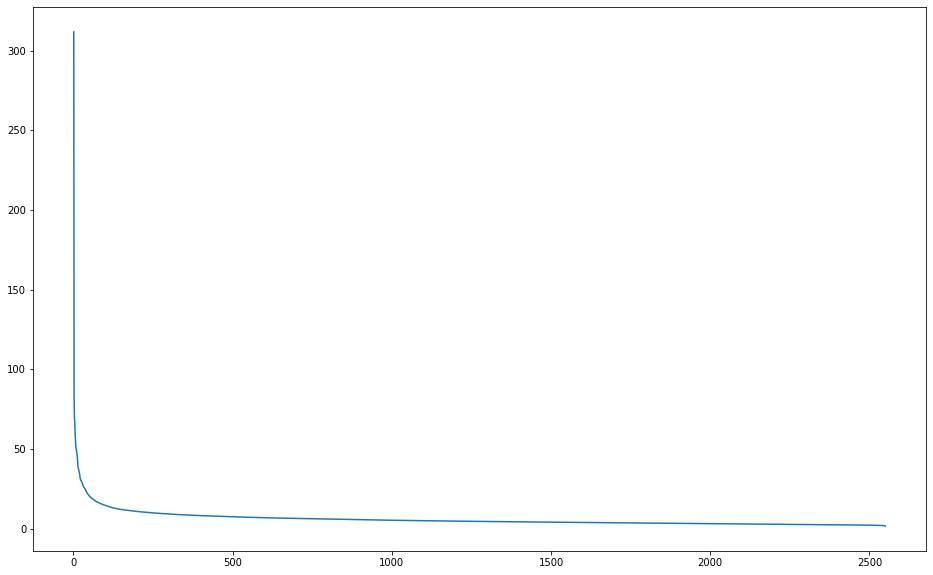

In [43]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(1, s.shape[0] + 1), s, label="singular values")

In [44]:
rank_svd = 250

U_trunced = U[:, :rank_svd]
s_trunced = s[:rank_svd]
Vt_trunced = Vt[:rank_svd, :]

In [45]:
print(U_trunced.shape, s_trunced.shape, Vt_trunced.shape)

(15578, 250) (250,) (250, 2550)


In [46]:
corpus_lsa = U_trunced.dot(np.diag(s_trunced)).dot(Vt_trunced)

In [47]:
corpus_lsa.shape

(15578, 2550)

In [48]:
corpus_lsa[0]

array([ 1.03995075,  0.01802104,  0.03189391, ..., -0.01736051,
       -0.03181163, -0.09552215])

Here you can run experiments on word similarity measurement.

In [49]:
corpus_lsa = corpus_lsa.T

In [50]:
index_lsa_bow = similarities.MatrixSimilarity(corpus_lsa, num_features=len(corpora_dict))

In [51]:
search(index_lsa_bow, "healthy food", prints=True)

healthy food

Josette Sheeran, the head of the UN's World Food Program, talks about why, in a world with enough food for everyone, people still go hungry, still die of starvation, still use food as a weapon of war. Her vision: "Food is one issue that cannot be solved person by person. We have to stand together." 	 2.3478331565856934

We're headed towards a global food crisis: Nearly 3 billion people depend on the ocean for food, and at our current rate we already take more fish from the ocean than it can naturally replace. In this fact-packed, eye-opening talk, entrepreneur and conservationist Mike Velings proposes a solution: Aquaculture, or fish farming. "We must start using the ocean as farmers instead of hunters," he says, echoing Jacques Cousteau. "The day will come where people will demand farmed fish on their plates that's farmed well and farmed healthy -- and refuse anything less." 	 2.002673387527466

What if we could grow delicious, nutrient-dense food, indoors anywhere in th

In [71]:
user_input = input("Enter a search term: ")
search(index_lsa_bow, user_input, prints=True)

Enter a search term: healthy food
healthy food

Josette Sheeran, the head of the UN's World Food Program, talks about why, in a world with enough food for everyone, people still go hungry, still die of starvation, still use food as a weapon of war. Her vision: "Food is one issue that cannot be solved person by person. We have to stand together." 	 2.3478331565856934

We're headed towards a global food crisis: Nearly 3 billion people depend on the ocean for food, and at our current rate we already take more fish from the ocean than it can naturally replace. In this fact-packed, eye-opening talk, entrepreneur and conservationist Mike Velings proposes a solution: Aquaculture, or fish farming. "We must start using the ocean as farmers instead of hunters," he says, echoing Jacques Cousteau. "The day will come where people will demand farmed fish on their plates that's farmed well and farmed healthy -- and refuse anything less." 	 2.002673387527466

What if we could grow delicious, nutrient-

## LSI
It is almost the same that we did in the previous section but this time we will used a built-in function.

In [52]:
from gensim.models import LsiModel

In [53]:
model_lsi = LsiModel(corpus, id2word=corpora_dict.id2token, num_topics=rank_svd)

In [54]:
model_lsi.print_topics(5)

[(0,
  '0.496*"," + 0.399*"the" + 0.362*"." + 0.294*"and" + 0.249*"to" + 0.249*"of" + 0.248*"a" + 0.177*"in" + 0.133*"\'" + 0.104*"-"'),
 (1,
  '0.747*"the" + -0.511*"," + 0.326*"of" + -0.185*"a" + -0.096*"to" + -0.057*"and" + -0.047*"you" + 0.046*"world" + -0.037*"it" + -0.033*"."'),
 (2,
  '0.610*"," + -0.434*"a" + -0.423*"to" + -0.219*"\'" + 0.202*"the" + -0.200*"." + -0.146*"s" + -0.138*"it" + -0.124*"that" + -0.085*"you"'),
 (3,
  '0.667*"a" + -0.476*"to" + 0.380*"of" + -0.193*"\'" + -0.187*"we" + -0.122*"and" + -0.093*"s" + 0.091*"-" + -0.090*"the" + -0.075*"it"'),
 (4,
  '-0.773*"and" + 0.411*"to" + 0.256*"," + 0.207*"the" + -0.160*"--" + -0.134*"." + 0.133*"a" + -0.092*"we" + -0.065*"\'" + -0.057*"of"')]

In [55]:
for i in range(rank_svd):
    print(i, model_lsi.projection.s[i], s_trunced[i], np.allclose(model_lsi.projection.s[i], s_trunced[i]))

0 311.6703883126428 311.6703883126432 True
1 82.94899425936731 82.94899426708986 True
2 69.36921765072327 69.36921769710966 True
3 66.90975051616148 66.90975056924222 True
4 59.81155551131721 59.811555643567665 True
5 56.78171889946999 56.78171918222426 True
6 53.36609540012866 53.36609586356714 True
7 50.137380640686004 50.137381330991296 True
8 49.56390438671626 49.56390533763482 True
9 48.25687804936494 48.25687902549712 True
10 47.21979132797014 47.21979309810494 True
11 45.364008716104465 45.36401024444081 True
12 42.23883412834961 42.2388377105918 True
13 39.165315322049736 39.16532145635363 True
14 37.85028313111785 37.850290938387026 True
15 37.45446090268479 37.45447118818266 True
16 36.518755137850995 36.51876924988066 True
17 35.07795791127512 35.07797338006836 True
18 34.5755085709678 34.575527441122844 True
19 32.77990913591005 32.77993280848549 True
20 31.597164419502626 31.59721415475853 True
21 30.766097467774998 30.76616001724742 True
22 30.216258668156936 30.216312849

In [56]:
corpus_lsi = model_lsi[corpus]

In [57]:
len(corpus_lsi), len(corpus_lsi[0])

(2550, 250)

In [58]:
index_lsi_bow = similarities.MatrixSimilarity(corpus_lsi, num_features=len(corpora_dict))

In [59]:
search(index_lsi_bow, "education system", prints=True)

education system

You might have a 5-year plan, but what about a 200-year plan? Artist Raghava KK has set his eyes on an ultra-long-term horizon; at TEDxSummit, he shows how it helps guide today's choices and tomorrow's goals -- and encourages you to make your own 200-year plan too. 	 0.3953537344932556

At a TEDx event, 11-year-old Birke Baehr presents his take on a major source of our food -- far-away and less-than-picturesque industrial farms. Keeping farms out of sight promotes a rosy, unreal picture of big-box agriculture, he argues, as he outlines the case to green and localize food production. 	 0.3906412124633789

Jeff Han shows off a cheap, scalable multi-touch and pressure-sensitive computer screen interface that may spell the end of point-and-click. 	 0.36659711599349976

Minority Report science adviser and inventor John Underkoffler demos g-speak -- the real-life version of the film's eye-popping, tai chi-meets-cyberspace computer interface. Is this how tomorrow's computers

In [60]:
search(index_lsi_bow, "healthy food", prints=True)

healthy food

Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity. 	 0.0

With the same humor and humanity he exuded in "An Inconvenient Truth," Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming. 	 0.0

New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song. 	 0.0

In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy. 	 0.0

You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called "dev

In [70]:
user_input = input("Enter a search term: ")
search(index_lsi_bow, user_input, prints=True)

Enter a search term: TedX event and education system
TedX event and education system

Massimo Banzi helped invent the Arduino, a tiny, easy-to-use open-source microcontroller that's inspired thousands of people around the world to make the coolest things they can imagine -- from toys to satellite gear. Because, as he says, "You don't need anyone's permission to make something great." 	 0.3277713656425476

Keith Bellows gleefully outlines the engineering marvels of the camel, a vital creature he calls "the SUV of the desert." Though he couldn't bring a live camel to TED, he gets his camera crew as close as humanly possible to a one-ton beast in full rut. 	 0.26872217655181885

Designer Yves Behar digs up his creative roots to discuss some of the iconic objects he's created (the Leaf lamp, the Jawbone headset). Then he turns to the witty, surprising, elegant objects he's working on now -- including the "$100 laptop." 	 0.2596761882305145

Ed Ulbrich, the digital-effects guru from Digital